In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))http://localhost:8882/notebooks/checkTestSums-Copy3.ipynb#

In [3]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestATFRAD_3/'

In [4]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [5]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIVNO3', 'BIOTRNO3', 'PHYSTRNO3', 'ALLTRNO3', 'AFILTNO3', 'NO3_E3T', 'NO3TVDTRA1', 'NO3TVDTRA2'])

In [6]:
no3sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP.variables['NO3_E3T'][:,:,:,:],3),2),1)
physSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
bioSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['BIOTRNO3'][:,:,:,:],3),2),1)
allSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ALLTRNO3'][:,:,:,:],3),2),1)
rivSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['RIVNO3'][:,:,:,:],3),2),1)
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['AFILTNO3'][:,:,:,:],3),2),1)
tvd1Sum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NO3TVDTRA1'][:,:,:,:],3),2),1)
tvd2Sum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['NO3TVDTRA2'][:,:,:,:],3),2),1)

In [7]:
no3diff=(no3sum[1:]-no3sum[:-1])/(24*3600)

In [8]:
np.shape(fP.variables['NO3_E3T'])

(5, 40, 898, 398)

In [9]:
24*3600/2160

40.0

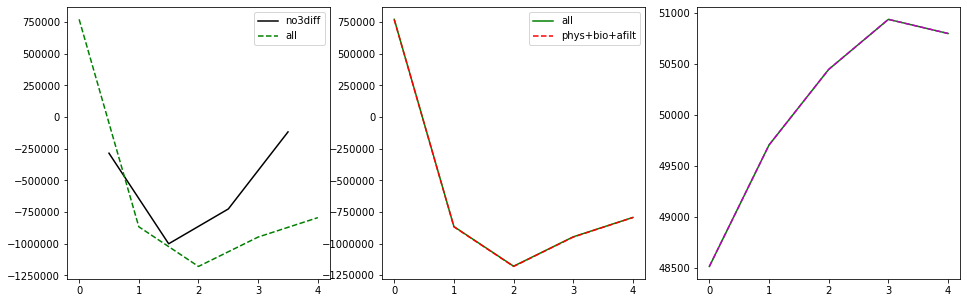

In [12]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(np.arange(0.5,4,1),no3diff,'k-',label='no3diff')
ax[0].plot(range(0,5),allSum,'g--',label='all')
#ax[0].plot(range(0,5),afiltSum,'b--',label='afilt')
ax[0].legend()
ax[1].plot(range(0,5),allSum,'g-',label='all')
ax[1].plot(range(0,5),physSum+bioSum+afiltSum,'r--',label='phys+bio+afilt')
#ax[1].plot(range(0,5),bioSum,'k-',label='bio')
#ax[1].plot(range(0,5),nitrSum-PPSum,'r--',label='NITR-PP')
ax[1].legend()
ax[2].plot(range(0,5),rivSum,'g-',label='all')
ax[2].plot(range(0,5),tvd1Sum,'m--',label='all')

In [13]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Malaspina_U*.nc')[0]) as f:
    malUA=np.sum(np.sum(f.variables['NO3TVDX'][:,:,:,0],2),1)
    malUD=np.sum(np.sum(f.variables['ULDFNO3'][:,:,:,0],2),1)

In [14]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Haro_V*.nc')[0]) as f:
    harVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    harVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [15]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_SJC_V*.nc')[0]) as f:
    sjcVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    sjcVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [16]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Rosario_V*.nc')[0]) as f:
    rosVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    rosVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [17]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0]) as f:
    sutVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    sutVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

In [18]:
with nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Discovery_V*.nc')[0]) as f:
    disVA=np.sum(np.sum(f.variables['NO3TVDY'][:,:,0,:],2),1)
    disVD=np.sum(np.sum(f.variables['VLDFNO3'][:,:,0,:],2),1)

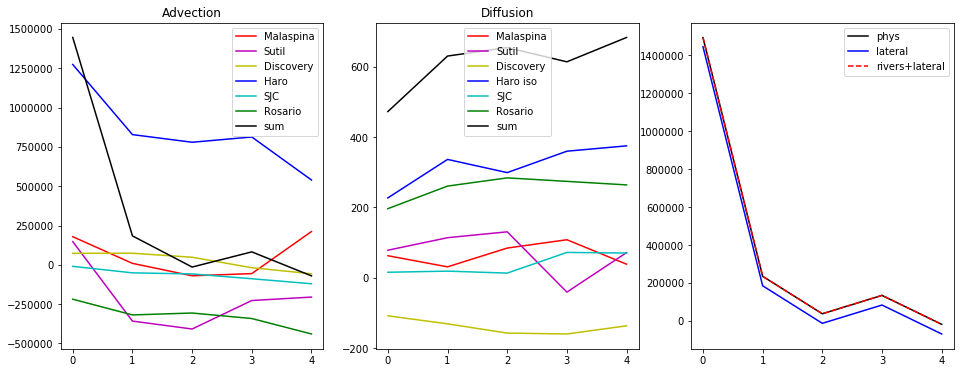

In [19]:
fig,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].plot(range(0,5),-1*malUA,'r-',label='Malaspina')
ax[0].plot(range(0,5),-1*sutVA,'m-',label='Sutil')
ax[0].plot(range(0,5),-1*disVA,'y-',label='Discovery')
ax[0].plot(range(0,5),harVA,'b-',label='Haro')
ax[0].plot(range(0,5),sjcVA,'c-',label='SJC')
ax[0].plot(range(0,5),rosVA,'g-',label='Rosario')
adv=harVA+sjcVA+rosVA-disVA-sutVA-malUA
ax[0].plot(range(0,5),adv,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection')
ax[1].plot(range(0,5),-1*malUD,'r-',label='Malaspina')
ax[1].plot(range(0,5),-1*sutVD,'m-',label='Sutil')
ax[1].plot(range(0,5),-1*disVD,'y-',label='Discovery')
ax[1].plot(range(0,5),harVD,'b-',label='Haro iso')
ax[1].plot(range(0,5),sjcVD,'c-',label='SJC')
ax[1].plot(range(0,5),rosVD,'g-',label='Rosario')
dif=harVD+sjcVD+rosVD-disVD-sutVD-malUD
ax[1].plot(range(0,5),dif,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion')
ax[2].plot(range(0,5),physSum,'k-',label='phys')
ax[2].plot(range(0,5),adv+dif,'b-',label='lateral')
ax[2].plot(range(0,5),adv+dif+rivSum,'r--',label='rivers+lateral')
#ax[2].plot(np.arange(0.5,4,1),no3diff,'k--',label='no3diff')
ax[2].legend()